## Quiz 1

Load the "Matching" library. (install with install.packages("Matching") and load with library(Matching)) 

Load the lalonde data set into working memory using data(lalonde)

3. What are the dimensions of the data set?
> 445\*12

4. What are the names of the columns?
> age, edu, black, hisp, married, etc.

5. How many different variable types are represented in this data set?
> 2, integers and numbers

6. What's the maximum value of the re74 column? (re74 indicates the person's real earnings in 1974)
> 39570.7

7. What's the minimum value of this column?
> 0

8. How many of the elements of this column are equal to zero?
> 326

9. How many elements of this column are less than \$5000 OR greater than \$10000?
> 409

10. How many people in this data set are married and have more than 8 years of education ("educ")?
> 68

In [2]:
library(Matching)
data("lalonde")
str(lalonde)

max(lalonde$re74)
min(lalonde$re74)
colSums(lalonde == 0) #for where all columns are 0
sum(lalonde$re74 == 0)
sum(lalonde$re74 < 5000 | lalonde$re74 > 10000)

sum(lalonde$married == 1 & lalonde$educ > 8)

Warning message:
“package ‘Matching’ was built under R version 3.4.4”Loading required package: MASS
## 
##  Matching (Version 4.9-3, Build Date: 2018-05-03)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



'data.frame':	445 obs. of  12 variables:
 $ age    : int  37 22 30 27 33 22 23 32 22 33 ...
 $ educ   : int  11 9 12 11 8 9 12 11 16 12 ...
 $ black  : int  1 0 1 1 1 1 1 1 1 0 ...
 $ hisp   : int  0 1 0 0 0 0 0 0 0 0 ...
 $ married: int  1 0 0 0 0 0 0 0 0 1 ...
 $ nodegr : int  1 1 0 1 1 1 0 1 0 0 ...
 $ re74   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ re75   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ re78   : num  9930 3596 24910 7506 290 ...
 $ u74    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ u75    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ treat  : int  1 1 1 1 1 1 1 1 1 1 ...


[1] 39570.7

[1] 0

age    educ   black    hisp married  nodegr    re74    re75    re78     u74 
      0       0      74     406     370      97     326     289     137     119 
    u75   treat 
    156     260

[1] 326

[1] 409

[1] 68

#### ADVANCED:

11. What is the interquartile range of "re78" (real earnings in 1978)? Use the "quantile" function.
> 8124.72

In [3]:
quantiles <- quantile(lalonde$re78)
interq_range <- quantiles[4] - quantiles[2]
names(interq_range) <- c("Mid 50%")
interq_range

Mid 50% 
8124.72

12. Create a scatterplot, with re74 on the x-axis, and re78 on the y-axis. Label the axes.
Draw a regression line if you wish (and choose a fun color).

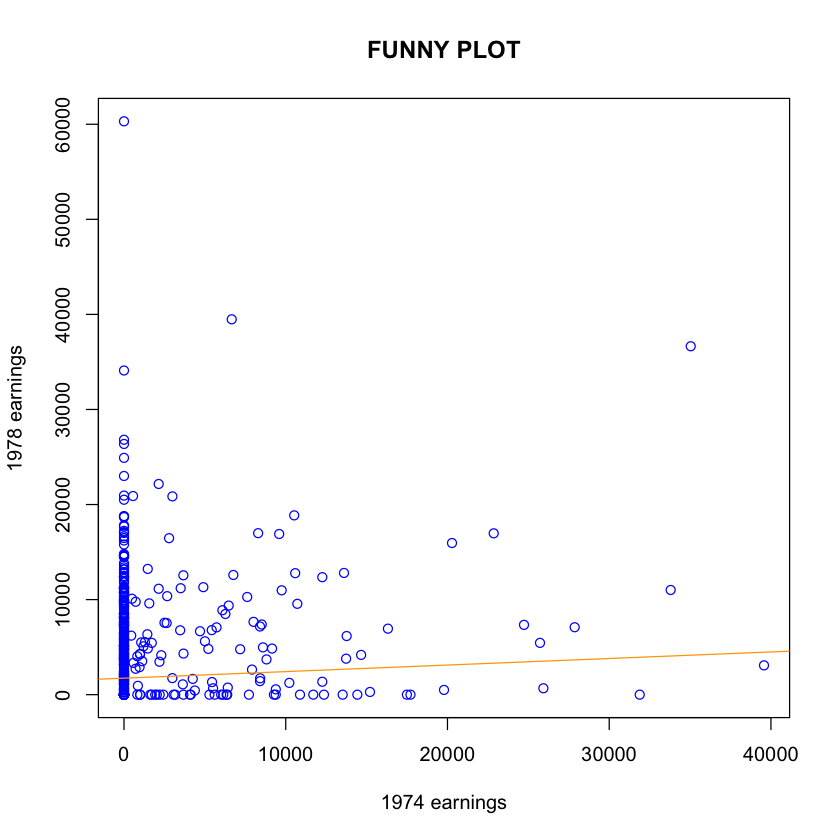

In [4]:
x <- lalonde$re74
y <- lalonde$re78

plot(x, y, main="FUNNY PLOT", xlab="1974 earnings",
     ylab="1978 earnings", col="blue")  #add  log= "xy" for log scale
abline(lm(x~y), col="orange")

13. Make a function with a single argument (column number) that outputs the median of that column.
Advanced: if the user specifies a non-numeric column, then the function returns an error message.

In [5]:
median_of_col <- function(column){
    if (typeof(column) != "integer" | typeof(column) != "double") {
        print("Error, non-numeric column.")
        break
    } else {
        median(column)
    }
}

14. Run a univariate regression, with "age" as a predictor (x variable), re75 as outcome (the "y").
Interpret the 2 coefficients (of the intercept, and the x variable).

15. Run a regression with 2 predictors, "age" and "educ", with re75 as the outcome (the "y").
Interpret the 3 coefficients (of the intercept, and the 2 x variables).

In [7]:
lm(re75 ~ age, lalonde)


Call:
lm(formula = re75 ~ age, data = lalonde)

Coefficients:
(Intercept)          age  
     784.62        23.35  


In [8]:
lm(re75 ~ age + educ, lalonde)


Call:
lm(formula = re75 ~ age + educ, data = lalonde)

Coefficients:
(Intercept)          age         educ  
     348.95        23.10        43.36  
